## 1. Introduction
<p><img style="float: left; margin:5px 20px 5px 1px; width:40%" src="https://www.nps.gov/aboutus/news/images/CDC-coronavirus-image-23311-for-web.jpg?maxwidth=650&autorotate=false"></p>
<p>In December 2019, COVID-19 coronavirus was first identified in the Wuhan region of China. By March 11, 2020, the World Health Organization (WHO) categorized the COVID-19 outbreak as a pandemic. A lot has happened in the months in between with major outbreaks in Iran, South Korea, and Italy. </p>
<p>We know that COVID-19 spreads through respiratory droplets, such as through coughing, sneezing, or speaking. But, how quickly did the virus spread across the globe? And, can we see any effect from country-wide policies, like shutdowns and quarantines? </p>
<p>Fortunately, organizations around the world have been collecting data so that governments can monitor and learn from this pandemic. Notably, the Johns Hopkins University Center for Systems Science and Engineering created a <a href="https://github.com/RamiKrispin/coronavirus">publicly available data repository</a> to consolidate this data from sources like the WHO, the Centers for Disease Control and Prevention (CDC), and the Ministry of Health from multiple countries.</p>
<p>In this notebook, you will visualize COVID-19 data from the first several weeks of the outbreak to see at what point this virus became a global pandemic.</p>
<p><em>Please note that information and data regarding COVID-19 is frequently being updated. The data used in this project was pulled on May 08, 2021, and should not be considered to be the most up to date data available.</em></p>


In [1]:
import numpy as np, pandas as pd
from IPython.display import Image
import matplotlib.pyplot as plt, seaborn as sns
import scipy
import warnings
import plotly.express as px
from itertools import product
import statsmodels.api as sm
import datetime
from tqdm import tqdm
warnings.filterwarnings('ignore')
print('All needed libraries were imported.')

All needed libraries were imported.


## 2. Analyzing World Confirmed Cases Data

In [2]:
datacase = pd.read_csv('country_cases.csv')
print('confirmed cases data is loaded.')
datacase.head(10)

confirmed cases data is loaded.


,date,province,country,lat,long,type,cases
0,2020-01-22,NaN,Afghanistan,33.93911,67.709953,confirmed,0
1,2020-01-22,NaN,Albania,41.15330,20.168300,confirmed,0
2,2020-01-22,NaN,Algeria,28.03390,1.659600,confirmed,0
3,2020-01-22,NaN,Andorra,42.50630,1.521800,confirmed,0
4,2020-01-22,NaN,Angola,-11.20270,17.873900,confirmed,0
5,2020-01-22,NaN,Antigua and Barbuda,17.06080,-61.796400,confirmed,0
6,2020-01-22,NaN,Argentina,-38.41610,-63.616700,confirmed,0
7,2020-01-22,NaN,Armenia,40.06910,45.038200,confirmed,0
8,2020-01-22,Australian Capital Territory,Australia,-35.47350,149.012400,confirmed,0
9,2020-01-22,New South Wales,Australia,-33.86880,151.209300,confirmed,0


In [3]:
datacase.shape

(382320, 7)

In [4]:
datacase.drop(["lat","long"], axis=1, inplace=True)

In [5]:
datacase.head(10)

,date,province,country,type,cases
0,2020-01-22,NaN,Afghanistan,confirmed,0
1,2020-01-22,NaN,Albania,confirmed,0
2,2020-01-22,NaN,Algeria,confirmed,0
3,2020-01-22,NaN,Andorra,confirmed,0
4,2020-01-22,NaN,Angola,confirmed,0
5,2020-01-22,NaN,Antigua and Barbuda,confirmed,0
6,2020-01-22,NaN,Argentina,confirmed,0
7,2020-01-22,NaN,Armenia,confirmed,0
8,2020-01-22,Australian Capital Territory,Australia,confirmed,0
9,2020-01-22,New South Wales,Australia,confirmed,0


In [6]:
datacase.shape

(382320, 5)

### 2a. Analyzing Turkey Confirmed Cases Data

In [7]:
datacase_tr = datacase[datacase.country == 'Turkey']
datacase_tr

,date,province,country,type,cases
249,2020-01-22,NaN,Turkey,confirmed,0
524,2020-01-23,NaN,Turkey,confirmed,0
799,2020-01-24,NaN,Turkey,confirmed,0
1074,2020-01-25,NaN,Turkey,confirmed,0
1349,2020-01-26,NaN,Turkey,confirmed,0
...,...,...,...,...,...
381254,2021-05-03,NaN,Turkey,recovered,35438
381514,2021-05-04,NaN,Turkey,recovered,38218
381774,2021-05-05,NaN,Turkey,recovered,35464
382034,2021-05-06,NaN,Turkey,recovered,37298


In [8]:
datacase_tr = datacase_tr[["date","type","cases"]]
datacase_tr

,date,type,cases
249,2020-01-22,confirmed,0
524,2020-01-23,confirmed,0
799,2020-01-24,confirmed,0
1074,2020-01-25,confirmed,0
1349,2020-01-26,confirmed,0
...,...,...,...
381254,2021-05-03,recovered,35438
381514,2021-05-04,recovered,38218
381774,2021-05-05,recovered,35464
382034,2021-05-06,recovered,37298


In [46]:
datacase_tr.sort_values("cases")

,date,type,cases
249,2020-01-22,confirmed,0
262174,2020-01-31,recovered,0
261914,2020-01-30,recovered,0
261654,2020-01-29,recovered,0
261394,2020-01-28,recovered,0
...,...,...,...
380474,2021-04-30,recovered,68183
380994,2021-05-02,recovered,75182
380734,2021-05-01,recovered,81302
89074,2020-12-10,confirmed,823225


In [63]:
datacase_tr_new = datacase_tr[(datacase_tr["date"]!="2020-12-12") & (datacase_tr["date"]!="2020-12-10")]
print(datacase_tr_new.columns)
datacase_tr_new.sort_values("cases")

Index(['date', 'type', 'cases'], dtype='object')


,date,type,cases
249,2020-01-22,confirmed,0
261914,2020-01-30,recovered,0
261654,2020-01-29,recovered,0
261394,2020-01-28,recovered,0
261134,2020-01-27,recovered,0
...,...,...,...
123999,2021-04-16,confirmed,63082
378394,2021-04-22,recovered,65593
380474,2021-04-30,recovered,68183
380994,2021-05-02,recovered,75182


In [50]:
datacase_tr_confirmed = datacase_tr_new[datacase_tr_new.type == 'confirmed']
datacase_tr_confirmed

,date,type,cases
249,2020-01-22,confirmed,0
524,2020-01-23,confirmed,0
799,2020-01-24,confirmed,0
1074,2020-01-25,confirmed,0
1349,2020-01-26,confirmed,0
...,...,...,...
128674,2021-05-03,confirmed,24733
128949,2021-05-04,confirmed,28997
129224,2021-05-05,confirmed,26476
129499,2021-05-06,confirmed,22388


In [51]:
print(datacase_tr_confirmed[datacase_tr_confirmed["cases"] == datacase_tr_confirmed["cases"].max()])
datacase_tr_confirmed.sort_values("cases")

              date       type  cases
123999  2021-04-16  confirmed  63082


,date,type,cases
249,2020-01-22,confirmed,0
7949,2020-02-19,confirmed,0
8224,2020-02-20,confirmed,0
8499,2020-02-21,confirmed,0
8774,2020-02-22,confirmed,0
...,...,...,...
123724,2021-04-15,confirmed,61400
125374,2021-04-21,confirmed,61967
124274,2021-04-17,confirmed,62606
123449,2021-04-14,confirmed,62797


In [53]:
datacase_tr_recovered = datacase_tr_new[datacase_tr_new.type == 'recovered']
datacase_tr_recovered

,date,type,cases
259834,2020-01-22,recovered,0
260094,2020-01-23,recovered,0
260354,2020-01-24,recovered,0
260614,2020-01-25,recovered,0
260874,2020-01-26,recovered,0
...,...,...,...
381254,2021-05-03,recovered,35438
381514,2021-05-04,recovered,38218
381774,2021-05-05,recovered,35464
382034,2021-05-06,recovered,37298


In [54]:
print(datacase_tr_recovered[datacase_tr_recovered["cases"] == datacase_tr_recovered["cases"].max()])
datacase_tr_recovered.sort_values("cases")

              date       type  cases
380734  2021-05-01  recovered  81302


,date,type,cases
259834,2020-01-22,recovered,0
268674,2020-02-25,recovered,0
268934,2020-02-26,recovered,0
269194,2020-02-27,recovered,0
269454,2020-02-28,recovered,0
...,...,...,...
378654,2021-04-23,recovered,60176
378394,2021-04-22,recovered,65593
380474,2021-04-30,recovered,68183
380994,2021-05-02,recovered,75182


In [55]:
datacase_tr_death = datacase_tr_new[(datacase_tr_new["type"] != 'recovered') & (datacase_tr_new["type"] != 'confirmed')]
datacase_tr_death

,date,type,cases
130049,2020-01-22,death,0
130324,2020-01-23,death,0
130599,2020-01-24,death,0
130874,2020-01-25,death,0
131149,2020-01-26,death,0
...,...,...,...
258474,2021-05-03,death,347
258749,2021-05-04,death,336
259024,2021-05-05,death,356
259299,2021-05-06,death,304


In [56]:
print(datacase_tr_death[datacase_tr_death["cases"] == datacase_tr_death["cases"].max()])
datacase_tr_death.sort_values("cases")

              date   type  cases
257649  2021-04-30  death    394


,date,type,cases
130049,2020-01-22,death,0
138299,2020-02-21,death,0
138574,2020-02-22,death,0
138849,2020-02-23,death,0
139124,2020-02-24,death,0
...,...,...,...
255449,2021-04-22,death,354
259024,2021-05-05,death,356
255174,2021-04-21,death,362
257924,2021-05-01,death,373


In [62]:
datacase_tr_type = datacase_tr_new.groupby(["date", "type"], as_index=True).sum()
print(datacase_tr_type.columns)
datacase_tr_type

Index(['cases'], dtype='object')


cases
date       type            
2020-01-22 confirmed      0
           death          0
           recovered      0
2020-01-23 confirmed      0
           death          0
...                     ...
2021-05-06 death        304
           recovered  37298
2021-05-07 confirmed  20107
           death        278
           recovered  35529

[1410 rows x 1 columns]

In [65]:
datacase_tr_type = datacase_tr_new.set_index("type")
datacase_tr_type

,date,cases
type,,
confirmed,2020-01-22,0
confirmed,2020-01-23,0
confirmed,2020-01-24,0
confirmed,2020-01-25,0
confirmed,2020-01-26,0
...,...,...
recovered,2021-05-03,35438
recovered,2021-05-04,38218
recovered,2021-05-05,35464


In [121]:
date = datacase_tr_type.loc['confirmed'].sort_values("date")["date"].reset_index()
cases = pd.DataFrame(date["date"].transpose())
cases

,date
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
465,2021-05-03
466,2021-05-04
467,2021-05-05
468,2021-05-06


In [122]:
confirmed = datacase_tr_type.loc['confirmed'].sort_values("date")["cases"].reset_index()
confirmed
cases["confirmed"] = confirmed["cases"]
cases

,date,confirmed
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0
...,...,...
465,2021-05-03,24733
466,2021-05-04,28997
467,2021-05-05,26476
468,2021-05-06,22388


In [123]:
recovered = datacase_tr_type.loc['recovered'].sort_values("date")["cases"].reset_index()
recovered
cases["recovered"] = recovered["cases"]
cases

,date,confirmed,recovered
0,2020-01-22,0,0
1,2020-01-23,0,0
2,2020-01-24,0,0
3,2020-01-25,0,0
4,2020-01-26,0,0
...,...,...,...
465,2021-05-03,24733,35438
466,2021-05-04,28997,38218
467,2021-05-05,26476,35464
468,2021-05-06,22388,37298


In [124]:
death = datacase_tr_type.loc['death'].sort_values("date")["cases"].reset_index()
death
cases["death"] = death["cases"]
cases

,date,confirmed,recovered,death
0,2020-01-22,0,0,0
1,2020-01-23,0,0,0
2,2020-01-24,0,0,0
3,2020-01-25,0,0,0
4,2020-01-26,0,0,0
...,...,...,...,...
465,2021-05-03,24733,35438,347
466,2021-05-04,28997,38218,336
467,2021-05-05,26476,35464,356
468,2021-05-06,22388,37298,304


<AxesSubplot:xlabel='date'>

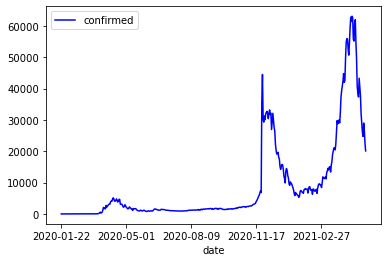

In [132]:
datacase_tr_type.loc['confirmed'].plot("date","cases",color='b',label='confirmed')

<AxesSubplot:xlabel='date'>

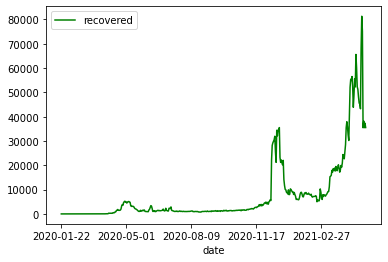

In [133]:
datacase_tr_type.loc['recovered'].plot("date","cases",color='g',label='recovered')

<AxesSubplot:xlabel='date'>

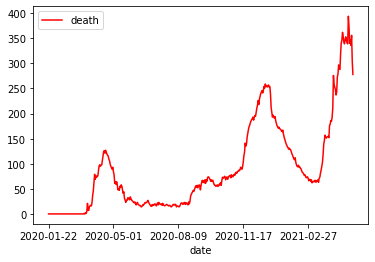

In [134]:
datacase_tr_type.loc['death'].plot("date","cases",color='r',label='death')

### 2b. Analyzing Turkey/UK Confirmed Cases Data

In [148]:
datacase_two_countries = datacase[datacase.country.isin(['Turkey','Italy'])]
datacase_two_countries

,date,province,country,type,cases
153,2020-01-22,NaN,Italy,confirmed,0
249,2020-01-22,NaN,Turkey,confirmed,0
428,2020-01-23,NaN,Italy,confirmed,0
524,2020-01-23,NaN,Turkey,confirmed,0
703,2020-01-24,NaN,Italy,confirmed,0
...,...,...,...,...,...
381774,2021-05-05,NaN,Turkey,recovered,35464
381938,2021-05-06,NaN,Italy,recovered,15867
382034,2021-05-06,NaN,Turkey,recovered,37298
382198,2021-05-07,NaN,Italy,recovered,15580


In [149]:
datacase_two_countries = datacase_two_countries[(datacase_two_countries["date"]!="2020-12-12") & (datacase_two_countries["date"]!="2020-12-10")]
print(datacase_two_countries.columns)
datacase_two_countries.sort_values("cases")

Index(['date', 'province', 'country', 'type', 'cases'], dtype='object')


,date,province,country,type,cases
317458,2020-08-31,NaN,Italy,recovered,-883
41128,2020-06-19,NaN,Italy,confirmed,-148
172303,2020-06-24,NaN,Italy,death,-31
268318,2020-02-24,NaN,Italy,recovered,-1
153,2020-01-22,NaN,Italy,confirmed,0
...,...,...,...,...,...
123999,2021-04-16,NaN,Turkey,confirmed,63082
378394,2021-04-22,NaN,Turkey,recovered,65593
380474,2021-04-30,NaN,Turkey,recovered,68183
380994,2021-05-02,NaN,Turkey,recovered,75182


In [150]:
datacase_two_countries = datacase_two_countries[["date","country","type","cases"]]
datacase_two_countries

,date,country,type,cases
153,2020-01-22,Italy,confirmed,0
249,2020-01-22,Turkey,confirmed,0
428,2020-01-23,Italy,confirmed,0
524,2020-01-23,Turkey,confirmed,0
703,2020-01-24,Italy,confirmed,0
...,...,...,...,...
381774,2021-05-05,Turkey,recovered,35464
381938,2021-05-06,Italy,recovered,15867
382034,2021-05-06,Turkey,recovered,37298
382198,2021-05-07,Italy,recovered,15580


In [151]:
datacase_two_countries = datacase_two_countries.set_index("country")
datacase_two_countries

,date,type,cases
country,,,
Italy,2020-01-22,confirmed,0
Turkey,2020-01-22,confirmed,0
Italy,2020-01-23,confirmed,0
Turkey,2020-01-23,confirmed,0
Italy,2020-01-24,confirmed,0
...,...,...,...
Turkey,2021-05-05,recovered,35464
Italy,2021-05-06,recovered,15867
Turkey,2021-05-06,recovered,37298


In [175]:
#datacase_two_countries.loc['Turkey'].plot("date","cases",color='r',label='death')
#datacase_two_countries.loc['Italy'].plot("date","cases",color='g',label='death')
datacase_two_countries_type = datacase_two_countries.groupby(["country","date","type"]).sum()
datacase_two_countries_type.loc["Turkey"]["confirmed"].plot(y="cases")

KeyError: 'confirmed'

## 3. Analyzing World Vaccination Data

In [ ]:
datavac = pd.read_csv('country_vaccinations.csv')
print('world vaccinations data is loaded.')
datavac

In [ ]:
datavac.shape

In [ ]:
datavac[datavac.country == 'Turkey'].tail(10)

In [ ]:
datavac = datavac.drop(datavac[(datavac.date=='2021-02-07') | (datavac.date=='2021-02-06')].index)

Before: Now, let's check out if we have any missing data in our dataset.

In [ ]:
datavac.isna().sum()

Before: Let's drop total_vaccinations missing data, as without this value any raw doesn't make much sense.

In [ ]:
datavac = datavac.drop(datavac[datavac.total_vaccinations.isna()].index)

In [ ]:
datavac.isna().sum()

In [ ]:
check_data = datavac.drop(datavac[datavac.people_vaccinated.isna()].index)

In [ ]:
check_data.isna().sum()

In [ ]:
check_data.head()

After: As can bee seen from our data, the values of total_vaccinations column are mostly the same as people_vaccenated column's. total_vaccinations_per_hundred's and people_vaccinated_per_hundred are also very similar.

Before:
Let's check the correlation to understand if it is so.

In [ ]:
plt.subplots(figsize=(8, 8))
sns.heatmap(check_data.corr(), annot=True, square=True)
plt.show()

After:
As can bee seen from the heatmap, these features have almost ideal correlation.

Info: people_vaccinated and people_vaccinated_per_hundred greatly correlates with total_vaccinations and total_vaccinations_per_hundred.

Info: Let's check the hypothesis that these columns distributions are the same.

Info: Now and then we will use Mann-Whithey U test for this goal.

Before: Mann-Whithey U test is used to check the hypothesis that total_vaccinations and people_vaccinated distributions are the same. 

In [ ]:
scipy.stats.mannwhitneyu(check_data.total_vaccinations, check_data.people_vaccinated, alternative='two-sided')

After: p-value is much less than 0.05, which means we can't reject our hyphotesis therefore we accept our hyphotesis.

Before: Mann-Whithey U test is used to check the hypothesis that total_vaccinations_per_hundred and people_vaccinated_per_hundred distributions are the same. 

In [ ]:
scipy.stats.mannwhitneyu(check_data.total_vaccinations_per_hundred, check_data.people_vaccinated_per_hundred, alternative='two-sided')

After: p-value is much less than 0.05, which means we can't reject our hyphotesis therefore we accept our hyphotesis.

Before: So, we will fill the missing values with the difference of these column's mean values.

In [ ]:
diff = check_data.total_vaccinations.mean() - check_data.people_vaccinated.mean()
diff_per_hundred = check_data.total_vaccinations_per_hundred.mean() - check_data.people_vaccinated_per_hundred.mean()

datavac.people_vaccinated = datavac.people_vaccinated.fillna(datavac.total_vaccinations - diff)
datavac.people_vaccinated_per_hundred = datavac.people_vaccinated_per_hundred.fillna(datavac.total_vaccinations_per_hundred - diff_per_hundred)

Before: Let's check if everything ok.

In [ ]:
datavac.isna().sum()

Info: daily_vaccinations and daily_vaccinations_per_million greatly correlates with people_vaccinated and people_vaccinated_per_hundred.

Before: Let's check the hypothesis that these columns distributions are the same.

In [ ]:
scipy.stats.mannwhitneyu(check_data.people_vaccinated, check_data.daily_vaccinations)

In [ ]:
scipy.stats.mannwhitneyu(check_data.people_vaccinated_per_hundred, check_data.daily_vaccinations_per_million)

After: p-values are much less than 0.05, which means we will reject our hypothesis.

Before: So, let's just fill missing values with zeros.

In [ ]:
datavac.daily_vaccinations = datavac.daily_vaccinations.fillna(0)
datavac.daily_vaccinations_per_million = datavac.daily_vaccinations_per_million.fillna(0)

Before: Let's check if everything ok.

In [ ]:
datavac.isna().sum()

Info: people_fully_vaccinated and people_fully_vaccinated_per_hundred greatly correlates with total_vaccinations and total_vaccinations_per_hundred.

Before: Let's check the hypothesis that these columns distributions are the same.

In [ ]:
scipy.stats.mannwhitneyu(check_data.people_fully_vaccinated, check_data.total_vaccinations)

In [ ]:
scipy.stats.mannwhitneyu(check_data.people_fully_vaccinated_per_hundred, check_data.total_vaccinations_per_hundred)

After: p-values are much less than 0.05, which means we will reject our hypothesis.

Before: Let's fill missing values with 0.

In [ ]:
datavac.people_fully_vaccinated = datavac.people_fully_vaccinated.fillna(0)
datavac.people_fully_vaccinated_per_hundred = datavac.people_fully_vaccinated_per_hundred.fillna(0)

Before: Let's check if everything ok.

In [ ]:
datavac.isna().sum()

Info: daily_vaccinations_raw greatly correlates with daily_vaccinations.

Before: Let's check the hypothesis that these columns distributions are the same.

In [ ]:
scipy.stats.mannwhitneyu(check_data.daily_vaccinations_raw, check_data.daily_vaccinations)

After: p-values are much less than 0.05, which means we will reject our hypothesis.

Before: Let's fill missing values with 0.

In [ ]:
datavac.daily_vaccinations_raw = datavac.daily_vaccinations_raw.fillna(0)

Before: Let's check if everything worked fine.

In [ ]:
datavac.isna().sum()

Before: Let's find out which countries have missing iso-code.

In [ ]:
datavac[datavac.iso_code.isna()].country.unique()

After: Thats the iso-codes which are used for these countries : GB-ENG for England, NC for Northern Cyprus, GB-NIR for Northern Ireland, GB-SCT for Scotland, GB-WLS for Wales.

Before: We will fill missing iso-codes with appropriate ones.

In [ ]:
datavac[datavac.country == 'England'] = datavac[datavac.country == 'England'].fillna('GB-ENG')
datavac[datavac.country == 'Northern Ireland'] == datavac[datavac.country == 'Northern Ireland'].fillna('GB-NIR')
datavac[datavac.country == 'Scotland'] = datavac[datavac.country == 'Scotland'].fillna('GB-SCT')
datavac[datavac.country == 'Wales'] = datavac[datavac.country == 'Wales'].fillna('GB-WLS')
datavac = datavac.fillna('NC')

After: We have finally dealt with missing data, which was quite long 😀

Before: First of all, let's vizualize which countries do have the highest ammount of vaccinated citizens.

In [ ]:
cols = ['country', 'total_vaccinations', 'iso_code', 'vaccines', 'total_vaccinations_per_hundred']
vacc_amount = datavac[cols].groupby('country').max().sort_values('total_vaccinations', ascending=False)
vacc_amount

In [ ]:
countries =( "Turkey")
filt = datavac[cols]['country'].eq(countries)
datavac1 = datavac.loc[filt]
datavac1

In [ ]:
datavc1 = datavac1.loc[filt,['country','date','total_vaccinations', 'iso_code', 'vaccines', 'total_vaccinations_per_hundred']]
datavac1

In [ ]:
cols = ['country', 'total_vaccinations', 'iso_code', 'vaccines', 'total_vaccinations_per_hundred']
vacc_amount = datavac1[cols].groupby('country').max().sort_values('total_vaccinations', ascending=False)
vacc_amount

In [176]:
plt.figure(figsize=(16, 7))
plt.bar(vacc_amount.index, vacc_amount.total_vaccinations)
plt.xticks(rotation = 90)
plt.ylabel('Amount of vaccinated citizens')
plt.xlabel('Countries')
plt.show()

NameError: name 'vacc_amount' is not defined

<Figure size 1152x504 with 0 Axes>

After: As can be seen from the plot, China and USA vaccination amounts are much greater then other countrie's. But the leader in vaccination is USA.

Before: Let's take a look at the same data, but on the map.

In [ ]:
fig = px.choropleth(locations=vacc_amount.iso_code, color=vacc_amount.total_vaccinations, title='Amount of vaccinated citizens', 
                   color_continuous_scale='rainbow')
fig.show('notebook')

After: As could be seen from this map, many European countries along with some Arabic counties Indonesia, Argentina and Ecuador have the lowest amount of vaccinated citizens. At the same time, United Kingdom (mostly England, the biggest part of UK) which is really close to Europe is top 3 vaccinations amount country.

Info: Let's find out which country has the highest level of vaccinated people per hundred.

Before: This way we will understand, which country has its biggest part of population vaccinated.

In [ ]:
vacc_amount = vacc_amount.sort_values('total_vaccinations_per_hundred', ascending=False)

In [ ]:
plt.figure(figsize=(14, 5))
plt.bar(vacc_amount.index, vacc_amount.total_vaccinations_per_hundred)
plt.xticks(rotation = 90)
plt.ylabel('Amount of vaccinated people per hundred')
plt.xlabel('Countries')
plt.show()

After: Israel, UAE, Gibraltar have the highest level of vaccinated people per hundred. ut we shouldn't forget, that the population of these countries isn't really high, so that might be the reason of such a high statistic indicators. 
United Kingdom (along with England, Northern Ireland, Scotland and Wales) also have really high results, as it's population is almost 7 times higher than UAE's and Israels, and what is really incredible, 2016 times higher than Gibraltar's!

Before: Now, let's take a look at the same data on map.

In [ ]:
fig = px.choropleth(locations=vacc_amount.iso_code, color=vacc_amount.total_vaccinations_per_hundred, title='Amount of vaccinated citizens per hundred', 
                   color_continuous_scale='rainbow')
fig.show('notebook')

After: It could now be seen that USA's level of vaccinated per hundred is also high and the lowest level have Russia, Mexico, Southern America and Asian countries.

Info: Now let's find out which vaccine is the most popular.

In [ ]:
vacc_pop = vacc_amount.groupby('vaccines').sum().sort_values('total_vaccinations', ascending=False)

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(vacc_pop.index, vacc_pop.total_vaccinations)
plt.xticks(rotation = 90)
plt.ylabel('Amount of vaccinated people')
plt.xlabel('Vaccines')
plt.show()

After: What is shown on the plot, is the fact that Pfizer/BioNTech vaccine seems to be the most popular and the most wide-spread one and Covishield along with Covaxin are problaby least popular.

Before: Let's also vizualize it on a map.

In [ ]:
fig = px.choropleth(locations=vacc_amount.iso_code, color=vacc_amount.vaccines, title='Name of the vaccine', 
                   color_continuous_scale='rainbow')
fig.show()

After: It could be easily seen that Pfizer/BioNTech is really the most popular and wide-spread vaccine. People mostly prefer it in Europe and Northern America. The Sputnik V vaccine is used by Russia, Argentina and Serbia. Only Asian countries prefer Covaxin, Covishield. Sinovac is being used in Turkey, Indonesia, Brazil and China and finally, CNBG is only being used in China.

Before: How the vaccination process changed through the time

In [ ]:
datavac1

In [ ]:
t_cols = ['date', 'total_vaccinations']
timeseries_cov = datavac1[t_cols].groupby('date').sum()[4:-1]

def invboxcox(y, l):
    if l == 0:
        return np.exp(y)
    else:
        return np.exp(np.log(l*y+1)/l)

In [ ]:
timeseries_cov

In [ ]:
plt.figure(figsize=(20,7))
timeseries_cov.total_vaccinations.plot()
plt.xticks(rotation=45)
plt.show()

After: What can bee seen, is that despite some days the amount of vaccinated people falls, the vaccination has strong long uptrend.

Info: Timeseries transformations to make it stationary

Info: To be able to predict future values, our timeseries must be stationary.

Info: Let's check if it is true with the help of Dickey-Fuller test.

Before: Our hypotethis is, that our timeseries isn't stationary.

In [ ]:
print('p-value : {}'.format(sm.tsa.stattools.adfuller(timeseries_cov)[1]))

After: Our p-value is extremely high and is higher than 0.05.

Before: Let's use Box-Cox transformation.

In [ ]:
timeseries_cov['total_vaccinations_box'], l = scipy.stats.boxcox(timeseries_cov.total_vaccinations)

In [ ]:
print('p-value : {}'.format(sm.tsa.stattools.adfuller(timeseries_cov.drop(columns=['total_vaccinations']))[1]))

After: Our p-value is still higher than 0.05.

In [ ]:
plt.figure(figsize=(20,7))
timeseries_cov.total_vaccinations_box.plot()
plt.xticks(rotation=45)
plt.show()

After: We will seasonly differentiate our timeseries with the interval of 2 days.

In [ ]:
timeseries_cov['total_vaccinations_box_diff1int2'] = timeseries_cov.total_vaccinations_box - timeseries_cov.total_vaccinations_box.shift(2)

In [ ]:
print('p-value : {}'.format(sm.tsa.stattools.adfuller(timeseries_cov.drop(columns=['total_vaccinations', 'total_vaccinations_box'])[2:])[1]))

After: Now our p-value is much less than 0.05, which means we could consider our timeseries not to be unstationary. Let's check if it is true with decomposing.

In [ ]:
sm.tsa.seasonal_decompose(timeseries_cov.total_vaccinations_box_diff1int2[2:], period=1).plot()
plt.show()

After: As we can see, trend disappeared because of our differentiation. Let's move on.

Info: ACF and PACF (Autocorrelation function and Partial autocorrelation function)

Before: Now, lets check Autocorrelation and Partial Autocorrelation of our timeseries.

In [ ]:
plt.figure(figsize=(20, 7))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(timeseries_cov.drop(columns=['total_vaccinations', 'total_vaccinations_box'])[2:], 
                         lags=(len(timeseries_cov)-4)/2, ax=ax)
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(timeseries_cov.drop(columns=['total_vaccinations', 'total_vaccinations_box'])[2:], 
                         lags=(len(timeseries_cov)-4)/2, ax=ax)
plt.show()

After: We will choose our parameters in range of 0-7.

Before: As we have done one seasonal and any simple differentiations, D (amount of seasonal diffs) will be 1 and d (amount of simple diffs) will be 0.

In [ ]:
d = 0
D = 1

Before: Now we will train many models and will choose the one with the best Akaike Information Criterion (AIC).

%%time
results = []
best_aic = float('inf')

parameters = list(product(np.arange(0, 7), np.arange(0, 7), np.arange(0, 7), np.arange(0, 7)))

for param in tqdm(parameters):
    try:
        arima = sm.tsa.statespace.SARIMAX(timeseries_cov.total_vaccinations_box, order=(param[0], d, param[1]), 
                                          seasonal_order=(param[2], D, param[3], 2)).fit(disp=False)
    except:
        continue
    aic = arima.aic
    if aic < best_aic:
        optimal_arima = arima
        best_aic = aic
        best_param = param
    results.append([param, optimal_arima.aic])

Before: Let's check the optimal model's info.

print(optimal_arima.summary())

Before: Now, let's compare our timeseries with ARIMA's.

timeseries_cov['arima'] = invboxcox(optimal_arima.fittedvalues, l)
plt.figure(figsize=(20,7))
timeseries_cov.total_vaccinations.plot()
timeseries_cov.arima.plot(color='r')
plt.xticks(rotation=45)
plt.show()

After: Seems like ARIMA's timeseries is pretty close to ours. Anyway, you can improve it's accuracy with using much higher parameters, which will also take a lot of time.

Before: Now, let's create predictions for the next week.

date = ['2021-02-'+str(x) for x in range(10, 17)]
timeseries = timeseries_cov['total_vaccinations']
pred_df = pd.DataFrame(index=date)
pred_df['total_vaccinations'] = invboxcox(optimal_arima.predict(start=44, end=50).values, l)
timeseries = pd.concat([timeseries, pred_df])

timeseries.drop(columns=[0])[-7:]

Before: And at the end let's vizualize our predictions.

timeseries_cov['arima'] = invboxcox(optimal_arima.fittedvalues, l)
plt.figure(figsize=(20,7))
timeseries.total_vaccinations.plot(color='r')
timeseries_cov.total_vaccinations.plot()
plt.xticks(rotation=45)
plt.show()

Read datasets/confirmed_cases_worldwide.csv into confirmed_cases_worldwide

confirmed_cases_worldwide = pd.read_csv('confirmed_cases_worldwide.csv')

See the result

confirmed_cases_worldwide.head()

Draw a line plot of cumulative cases vs. date

Label the y-axis

ggplot(confirmed_cases_worldwide, aes(x=date,y=cum_cases)) +
  geom_line() +
  ylab("Cumulative confirmed cases")